# CHAPTER 1 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.1 벡터와 행렬

- 벡터 : 크기와 방향을 가진 양  
    벡터는 숫자가 일렬로 늘어선 집합으로 표현할 수 있음  
    파이썬에서는 1차원 배열로 취급  
<br> 

- 행렬 : 숫자가 2차원 형태(사각형 형상)

In [1]:
import numpy as np

x = np.array([1,2,3])
x.__class__ # 클래스 이름 표시

numpy.ndarray

In [2]:
x.shape # 형상

(3,)

In [4]:
x.ndim # 차원 수

1

In [5]:
W = np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [6]:
W.ndim

2

### 1.1.2 행렬의 원소별 연산

원소별(element-wise) 연산 : 서로 대응하는 원소끼리 (각 원소가 독립적으로) 연산

In [8]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [9]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 1.1.3 브로드캐스트

<img src='./img/1/broadcast.png' width=500>

배열의 형상이 달라도 자동적으로 확장하여 형상이 다른 배열끼리의 연산을 수행할 수 있게 하는 기능

### 1.1.4 벡터의 내적과 행렬의 곱

- 벡터의 내적 : 두 벡터에서 대응하는 원소들의 곱을 모두 더한 것  
<br>

<center>$x\cdot y=x_1y_1+x_2y_2+\cdots +x_ny_n$</center>

- 행렬의 곱 : 왼쪽 행렬의 행벡터(가로 방향)와 오른쪽 행렬의 열벡터(세로 방향)의 내적(원소별 곱의 합)으로 계산  
    계산 결과는 새로운 행렬의 대응하는 원소에 저장됨  
<br>
<img src='./img/1/matrix_product_1.png' width=300>

In [10]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [12]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

### 1.1.5 행렬 형상 확인

행렬의 곱에서는 대응하는 차원의 원소 수를 일치시켜야 함  
<br>
<img src='./img/1/matrix_product_2.png' width=300>  
<br>
행렬 C의 형상은 A의 행 수와 B의 열 수가 됨

## 1.2 신경망의 추론

### 1.2.1 신경망 추론 전체 그림

ex) 입력층에 뉴런 2개, 은닉층에 뉴런 4개, 출력층에 뉴런 3개를 둔 신경망

<img src='./img/1/example.png' width=300>  

가중치와 뉴런의 값을 각각 곱해서 그 합이 다음 뉴런의 입력이 됨  
(정확하게는 그 합에 활성화 함수(activation function)을 적용한 값이 다음 뉴런의 입력이 됨)  
또, 이때 각 층에서는 이전 뉴런의 값에 영향받지 않은 '정수'인 편향(bias)도 더해짐

입력층의 데이터를 $(x_1, x_2)$, 가중치는 $(w_{11}, w_{21})$, 편향은 $b_1$으로 쓴다면,  
은닉층 중 첫 번째 뉴런 $h_1$는 다음과 같이 계산할 수 있다.  
  
$h_1=x_1w_{11}+x_2w_{21}+b_1$  
  
위와 같이 은닉층의 뉴런은 가중치의 합으로 계산됨  
이 값은 행렬의 곱으로 한꺼번에 계산할 수 있음  
  
  
$(h_1,h_2,h_3,h_4)=(x_1,x_2)\begin{pmatrix}w_{11}&w_{12}&w_{13}&w_{14} \\ w_{21}&w_{22}&w_{23}&w_{24} \end{pmatrix}+(b_1,b_2,b_3,b_4)$  
  
$h=xW+b$  
  
- x : 입력(1,2)
- h : 은닉층의 뉴런(1,4)
- W : 가중치(2,4)
- b : 편향(4,)  
  
\* 여기서, 편향 b1은 브로드캐스트 되어 더해짐
  
미니배치로 한번에 N개 데이터를 처리하는 경우   
  
- x : 입력(N,2)
- h : 은닉층의 뉴런(N,4)
- W : 가중치(2,4)
- b : 편향(4,)  

In [15]:
import numpy as np
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10,2) # 입력
h = np.matmul(x, W1) + b1

완전연결계층에 의한 변환은 '선형' 변환  
여기에 '비선형'효과를 부여하는 것이 활성화 함수  
비선형 활성화 함수를 이용함으로써 신경망의 표현력을 높일 수 있음  
  
ex) 시그모이드 함수(sigmoid function)  
  
$\sigma(x)=\frac{1}{1+exp(-x)}$  
  
시그모이드 함수는 알파벳 'S'자 모양의 곡선 함수  
임의의 실수를 입력받아 0에서 1 사이의 실수를 출력함

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [18]:
# 시그모이드 함수로 비선형 변환
a = sigmoid(h)

활성화 함수의 출력을 활성화(activation)이라고 함

In [19]:
# 종합
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

위 신경망 예시는 3차원 데이터를 출력합  
각 차원의 값을 이용하여 3 클래스 분류를 할 수 있음  
이 경우, 출력된 3차원 벡터의 각 차원은 각 클래스에 대응하는 '점수(score)'가 됨  
  
\* 점수란 '확률'이 되기 전의 값, 점수가 높을수록 그 뉴런에 해당하는 클래스의 확률도 높아짐  
\* 점수를 소프트맥스 함수(softmax function)에 입력하면 확률을 얻을 수 있음  
  
분류를 하면 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 됨  
  


### 1.2.2 계층으로 클래스화 및 순전파 구현

- 순전파(forward propagation) : 신경망 추론 과정에서 신경망을 구성하는 각 계층이 입력으로부터 출력 방향으로 처리 결과를 차례로 전파  
- 역전파(backward propagation) : 신경망 학습에서 데이터(기울기)를 순전파와는 반대 방향으로 전파

#### sigmoid 계층

In [20]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

#### Affine 계층

In [21]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

#### 신경망 구현( X(입력)  →  Affine  →  Sigmoid  →  Affine  →  S(점수) )

In [23]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

#### 신경망의 추론 수행

In [24]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

## 1.3 신경망의 학습

- 추론 : 문제의 답을 구하는 작업  
- 학습 : 최적의 매개변수 값을 찾는 작업

### 1.3.1 손실 함수

신경망 학습에서는 학습이 얼마나 잘 되고 있는지를 알기 위한 '척도'로 학습 단계의 특정 시점에서 신경망의 성능을 나타내는 손실(loss)를 사용  
손실은 학습 데이터(학습 시 주어진 정답 데이터)와 신경망이 예측한 결과를 비교하여 예측이 얼마나 나쁜가를 산출한 단일 값(스칼라)  
  
신경망의 손실은 손실 함수(loss function)을 사용해 구함  
다중 클래스 분류(multi-class classification) 신경망에서는 손실 함수로 흔히 교차 엔트로피 오차(Cross Entropy Error)를 사용  
  
Softmax 계층의 출력은 확률이 되고,  다음 계층인 Cross Entropy Error 계층에는 확률과 정답 레이블이 입력됨

- __소프트맥스 함수__  
  
    $y_k=\frac{exp(s_k}{\sum_{i=1}^nexp(s_i)}$  
  
소프트맥스 함수의 분자는 점수 $S_k$의 지수 함수이고, 분모는 모든 입력 신호의 지수 함수의 총합  
소프트맥스 함수의 출력의 각 원소는 0.0 이상 1.0 이하의 실수  
그리고 그 원소를 모두 더하면 1.0이 됨  
따라서 소프트맥스 함수의 출력을 '확률'로 해석할 수 있음  
  
- __교차 엔트로피 오차__  
  
    $L=-\sum_kt_klogy_k$   
  
여기서 t는 원핫 벡터로 표기한 정답레이블임  
따라서, L은 정답 레이블이 1의 원소에 해당하는 출력의 자연로그  
  
- __교차 엔트로피 오차(미니배치)__  
  
    $L=-\frac{1}{N}\sum_N\sum_kt_{nk}logy_{nk}$  
  
'평균 손실 함수'를 구함

### 1.3.2 미분과 기울기

신경망 학습의 목표는 손실을 최소화하는 매개변수를 찾는 것  
  
$y=f(x)$가 있을 때, x에 관한 y의 미분은 $\frac{\partial{y}}{\partial{x}}$  
  
여기서, $\frac{\partial{y}}{\partial{x}}$가 의미하는 것은 x의 값을 '조금' 변화시켰을 때(더 정확하게는 그 '조금의 변화'를 극한까지 줄일 때)  
y의 값이 얼마나 변하는가 하는 '변화의 정도'  
이는 함수의 '기울기'에 해당함  
  
-----------------
L은 스칼라, x는 벡터인 함수 $L=f(x)$인 경우,  
$x_i$에 대한 L의 미분은 다음과 같다.
  
$\frac{\partial{L}}{\partial{x}}=(\frac{\partial{L}}{\partial{x_1}},\frac{\partial{L}}{\partial{x_2}},\cdots,\frac{\partial{L}}{\partial{x_n}})$  
  
이처럼 벡터의 각 원소에 대한 미분을 정리한 것이 기울기(gradient)  
  
-----------------
W가 $m\times n$ 행렬이라면 $L=g(W)$함수의 기울기는 다음과 같다.  
  
$\frac{\partial{L}}{\partial{W}} =
 \begin{pmatrix}
  \frac{\partial{L}}{\partial{w_{11}}} & \dots & \frac{\partial{L}}{\partial{w_{1n}}} \\
  \vdots & \ddots &  \\
  \frac{\partial{L}}{\partial{w_{m1}}}  &   & \frac{\partial{L}}{\partial{w_{mn}}}  
 \end{pmatrix}$  
  
이처럼 L의 W에 대한 기울기를 행렬로 정리할 수 있음  
  
W와 $\frac{\partial{L}}{\partial{W}}$의 형상이 같음

### 1.3.3 연쇄 법칙

연쇄 법칙(chain rule) : 합성 함수에 대한 미분의 법칙  
  
ex) $y=f(x), z=g(y)$라는 두 함수가 있을 때, $z=g(f(x))$가 되고, 이 합성 함수의 미분(x에 대한 z의 미분)은 다음과 같다.
  
$\frac{\partial{z}}{\partial{x}}=\frac{\partial{z}}{\partial{y}}\frac{\partial{y}}{\partial{x}}$  
  
즉, x에 대한 z의 미분은 $y=f(x)$의 미분과 $z=g(y)$의 미분을 곱하여 구할 수 있음   
  
따라서 각 함수의 국소적인 미분을 계산할 수 있다면 그 값들을 곱해서 전체의 미분을 구할 수 있음  
오차역전파법에서 각 매개변수에 대한 손실의 기울기를 구할 때 연쇄 법칙을 이용함

### 1.3.4 계산 그래프

계산 그래프는 계산 과정을 시각적으로 보여줌  
  
- 순전파 : 처리 결과가 순서대로(왼쪽에서 오른쪽으로) 흐름
- 역전파 : 순전파와 반대 방향으로 전파됨  
    전파되는 값은 최종 출력의 각 변수에 대한 미분

#### 덧셈노드  
  
<img src='./img/1/sum_node.png' width=250>  
  
상류로부터 받은 값에 1을 곱하여 하류로 기울기를 전파  
  
#### 곱셈노드  
  
<img src='./img/1/mul_node.png' width=250>  
  
상류로부터 받은 기울기에 '순전파 시의 입력을 서로 바꾼 값'을 곱함  
  
#### 분기노드  
  
<img src='./img/1/repeat_node_1.png' width=250>  
  
분기 노드는 같은 값이 복제되어 분기  
분기 노드의 역전파는 상류에서 온 기울기들의 '합'이 됨  
  
#### Repeat 노드  
  
<img src='./img/1/repeat_node_2.png' width=250>  

N개로의 분기(복제) 노드

ex) 길이가 D인 배열을 N개로 복제하는 예  
이 역전파는 N개의 기울기를 모두 더해 구함

In [25]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis=0) # 순전파

dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) # 역전파

#### Sum 노드  
  
Sum 노드의 역전파는 상류로부터의 기울기를 모든 화살표에 분배  
Sum 노드와 Repeat 노드는 서로 '반대 관계'

In [29]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis=0, keepdims=True) # 순전파

dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0) # 역전파

#### MatMul 노드  
  
행렬의 곱셈 'Matrix Multiply'의 약자  
  
<img src='./img/1/matmul_node.png' width=250>  
  
$x$의 i번째 원소에 대한 미분  
  
$\frac{\partial{L}}{\partial{x_i}}=\sum_j\frac{\partial{L}}{\partial{y_j}}\frac{\partial{y_j}}{\partial{x_i}}$  
  
이 식의 $\frac{\partial{L}}{\partial{x_i}}$은 $x_i$를 변화시켰을 때 L이 얼마나 변할 것인가라는 '변화의 정도'를 나타냄  
여기서 $x_i$를 변화시키면 벡터 y의 모든 원소가 변하고, 그로 인해 L이 변하게 됨  
$x_i$에서 L에 이르는 연쇄 법칙의 경로는 여러 개가 있으며, 그 총합은 $\frac{\partial{L}}{\partial{x_i}}$이 됨  
  
$\frac{\partial{y_j}}{\partial{x_i}}=W_{ij}$이므로,  
  
$\frac{\partial{L}}{\partial{x_i}}=\sum_j\frac{\partial{L}}{\partial{y_j}}\frac{\partial{y_j}}{\partial{x_i}}=\sum_j\frac{\partial{L}}{\partial{y_j}}W_{ij}$  
  
$\frac{\partial{L}}{\partial{x_i}}$는 벡터 $\frac{\partial{L}}{\partial{y}}$와 W의 i행 벡터의 내적으로 구해짐을 알 수 있음  
  
따라서,  
  
$\frac{\partial{L}}{\partial{x}}=\frac{\partial{L}}{\partial{y}}W^T$  
  
마찬가지로,  
  
$\frac{\partial{L}}{\partial{W}}=X^T\frac{\partial{L}}{\partial{y}}$

In [30]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

< 참고 >  
  
~~~python
a = np.array([1,2,3])
b = np.array([4,5,6])
~~~
  
'a = b'와 'a[...] = b' 모두 a에는 [4,5,6]이 할당되나  
두 경우 a가 가리키는 메모리 위치는 서로 다름  

<img src='./img/1/deepcopy.png' width=500>  
  
a = b에서는 a가 가리키는 메모리 위치가 b가 가리키는 위치와 같아짐  
실제 데이터 (4,5,6)은 복제되지 않는 다는 뜻으로 이를 '얕은 복사'라고 함  
  
한편, a[...] = b일 때는, a의 메모리 위치는 변하지 않고, a가 가리키는 메모리에 b의 원소가 복제됨  
실제 데이터가 복제된다는 뜻에서 '깊은 복사'라고 함

### 1.3.5 기울기 도출과 역전파 구현

#### Sigmoid 계층

시그모이드 함수  
  
$y=\frac{1}{1+exp(-x}$  
  
위 식을 미분하면,  
  
$\frac{\partial{y}}{\partial{x}}=y(1-y)$  

In [31]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### Affine 계층(완전연결층)

In [32]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#### Softmax with Loss 계층

softmax 계층은 입력 ($a_1, a_2, a_3)$를 정규화하여 ($y_1, y_2, y_3$)을 출력  
Cross Entropy Error 계층은 Softmax의 출력 ($y_1, y_2, y_3$)과 정답 레이블($t_1, t_2, t_3)$을 받고, 이 데이터로부터 손실 L을 구해 출력  
  
Softmax 계층의 역전파는 ($y_1-t_1, y_2-t_2, y_3-t_3$)인 출력과 정답 레이블의 차이를 출력  
신경망의 역전파는 이 차이(오차)를 앞 계층에 전해줌

In [33]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        return dx

### 1.3.6 가중치 갱신

오차역전파법으로 기울기를 구했으면, 그 기울기를 사용하여 신경망의 매개변수를 갱신함  
  
신경망의 학습은 다음 순서로 수행  
  
1. 미니배치  
    훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.
2. 기울기 계산
    오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기르 ㄹ구한다.
3. 매개변수 갱신
    기울기를 사용하여 가중치 매개변수를 갱신한다.
4. 반복
    1 ~ 3 단계를 필요한 만큼 반복한다.  
  
  
기울기는 현재의 가중치 매개변수에서 손실을 가장 크게 하는 방향을 가리킴  
따라서 매개변수를 그 기울기와 반대 방향으로 갱신하면 손실을 줄일 수 있음  
이것이 바로 __경사하강법(Gradient Descent)__  
  
3단계에서 매개변수를 갱신하는 방법의 종류는 다양함  
  
그 중 확률적경사하강법(Stochastic Gradient Descent, SGD)는 (현재의) 가중치를 기울기 방향으로 일정한 거리만큼 갱신  
  
$W\leftarrow W-\eta\frac{\partial{L}}{\partial{W}}$  
  
- W : 갱신하는 가중치 매개변수
- $\frac{\partial{L}}{\partial{W}}$ : W에 대한 손실 함수의 기울기
- $\eta$ : 학습률(learning rate)

In [34]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

~~~python
# 신경망의 매개변수 갱신(예시)

model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치 획득
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...
~~~

## 1.4 신경망으로 문제를 풀다

### 1.4.1 스파이럴 데이터셋

<img src='./img/1/spiral_dataset.png' width=500>

In [36]:
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


입력은 2차원 데이터, 분류할 클래스 수는 3개  
위 그래프를 보면 직선만으로는 클래스들을 분리할 수 없음을 알 수 있음  
비선형 분리를 학습해야 함

### 1.4.2 신경망 구현

은닉층이 하나인 신경망 구현

In [42]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    # 추론 수행
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    # 순전파
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    # 역전파
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 학습용 코드

In [43]:
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr = learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 3. 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 4. 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 5. 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f |' % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0

| 에폭 1 | 반복 10 / 10 | 손실 1.13 |
| 에폭 2 | 반복 10 / 10 | 손실 1.13 |
| 에폭 3 | 반복 10 / 10 | 손실 1.12 |
| 에폭 4 | 반복 10 / 10 | 손실 1.12 |
| 에폭 5 | 반복 10 / 10 | 손실 1.11 |
| 에폭 6 | 반복 10 / 10 | 손실 1.14 |
| 에폭 7 | 반복 10 / 10 | 손실 1.16 |
| 에폭 8 | 반복 10 / 10 | 손실 1.11 |
| 에폭 9 | 반복 10 / 10 | 손실 1.12 |
| 에폭 10 | 반복 10 / 10 | 손실 1.13 |
| 에폭 11 | 반복 10 / 10 | 손실 1.12 |
| 에폭 12 | 반복 10 / 10 | 손실 1.11 |
| 에폭 13 | 반복 10 / 10 | 손실 1.09 |
| 에폭 14 | 반복 10 / 10 | 손실 1.08 |
| 에폭 15 | 반복 10 / 10 | 손실 1.04 |
| 에폭 16 | 반복 10 / 10 | 손실 1.03 |
| 에폭 17 | 반복 10 / 10 | 손실 0.96 |
| 에폭 18 | 반복 10 / 10 | 손실 0.92 |
| 에폭 19 | 반복 10 / 10 | 손실 0.92 |
| 에폭 20 | 반복 10 / 10 | 손실 0.87 |
| 에폭 21 | 반복 10 / 10 | 손실 0.85 |
| 에폭 22 | 반복 10 / 10 | 손실 0.82 |
| 에폭 23 | 반복 10 / 10 | 손실 0.79 |
| 에폭 24 | 반복 10 / 10 | 손실 0.78 |
| 에폭 25 | 반복 10 / 10 | 손실 0.82 |
| 에폭 26 | 반복 10 / 10 | 손실 0.78 |
| 에폭 27 | 반복 10 / 10 | 손실 0.76 |
| 에폭 28 | 반복 10 / 10 | 손실 0.76 |
| 에폭 29 | 반복 10 / 10 | 손실 0.78 |
| 에폭 30 | 반복 10 / 10 | 손실 0.75 |
| 에폭 31 | 반복 10 / 1

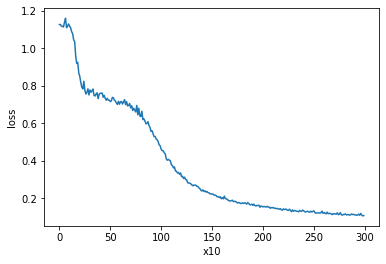

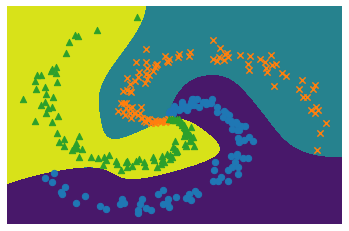

In [47]:
import warnings
warnings.filterwarnings('ignore')

### 학습에 따른 loss의 변화 시각화

# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('x10')
plt.ylabel('loss')
plt.show()

### 결정 경계(decision boundary) 시각화

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 1.4.4 Trainer 클래스

In [ ]:
import numpy
import time
import matplotlib.pyplot as plt
from common.np import *  # import numpy as np
from common.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()

- x : 입력 데이터
- t : 정답 레이블
- max_epoch(=10) : 학습을 수행하는 에폭 수
- batch_size(=32) : 미니배치 크기
- eval_interval(=20) : 결과(평균 손실 등)를 출력하는 간격
- max_grad(=None) : 기울기 최대 노름(norm)
    기울기 노름이 이 값을 넘어서면 기울기를 줄인다(이를 기울기 클리핑이라고 함)

Trainer 클래스를 활용한 학습 구현

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

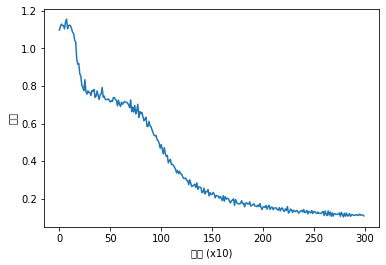

In [52]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## 1.5 계산 고속화

### 1.5.1 비트 정밀도

In [53]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

넘파이의 64비트 부동소수점 수를 표준으로 사용  
그러나,  
- 신경망의 추론과 학습은 32비트 부동소수점 수로도 인식률을 거의 떨어뜨리는 일 없이 수행할 수 있음
- 메모리 관점에서 항상 64비트에 비해 43비트가 더 조흥ㅁ
- 신경망 계산 시 데이터를 전송하는 '버스 대역 폭(bus bandwidth)'이 병목되는 경우가 종종 있으므로, 데이터 타입이 작은게 좋음
- 계산 속도 측면에서도 32비트 부동소수점 수가 일반적으로 더 빠름  
  
넘파이에서 32비트 부동소수점 수를 사용하려면 다음과 같이 데이터 타입을 지정

In [54]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [55]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

신경망 추론으로 한정하면, 16비트 부동소수점 수를 사용해도 인식률이 거의 떨어지지 않음  
하지만, 일반적으로 CPU와 GPU는 연산 자체를 32비트로 수행하므로 16비트로 변환하더라도 계산 자체는 32비트로 이뤄짐  
학습된 가중치를 저장할 때는 16비트 부동소수점 수가 여전히 유효(32비트에 비해 절반의 용량만 사용)

### 1.5.2 GPU(쿠파이)

딥러닝의 계산은 대량의 곱하기 연산으로 구성  
따라서 CPU보다 GPU가 유리  
  
쿠파이 : GPU를 이용해 병렬 계산을 수행해주는 라이브러리  
    넘파이와 호환되는 API를 제공함